In [1]:
import tensorflow as tf
import numpy as np

import cv2
import IPython.display as display
import PIL.Image

from tensorflow import keras

%load_ext autoreload
%autoreload 2

2022-10-30 15:31:14.989846: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 15:31:15.144723: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 15:31:15.738003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-30 15:31:15.738057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Optimize activations

In [2]:
# load model

model = keras.models.load_model(
    "/home/devel/ws.leonid/lectures/l5_visualization/outputs/cifar10_train/cifar10_train_2022-10-30_15-23-17"
)
model.summary()

2022-10-30 15:31:28.459437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/devel/ws.leonid/lectures/.venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-30 15:31:28.460026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/devel/ws.leonid/lectures/.venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-30 15:31:28.460040: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                             

In [3]:
# define optimizator
import sys

sys.path.append("/home/devel/ws.leonid/lectures")
from l5_visualization.scripts.optimizators import ActivationOptimizer

ao = ActivationOptimizer(
    model=model,
    layer_name="conv2d_2",
    activation_index=(slice(None), slice(None), 0),
    steps=5000,
    step_size=0.01,
    reg_coef=0.01,
)

In [4]:
# optimize
random_image = tf.random.uniform(
    [32, 32, 3],
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None,
)

loss, image_raw = ao(random_image)
print(loss.numpy())

Tracing
1009.00134


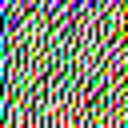

In [5]:
image = 255 * (image_raw)
image = tf.cast(image, tf.uint8)
image = np.array(image)
# resize
image = cv2.resize(image, [128, 128])
PIL.Image.fromarray(image)